In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("E:\\data\\cclass.csv")
data






,model,year,transmission,mileage,engineSize,fuelType,price
0,C Class,2020,Automatic,1200,2.0,Diesel,30495
1,C Class,2020,Automatic,1000,1.5,Petrol,29989
2,C Class,2020,Automatic,500,2.0,Diesel,37899
3,C Class,2019,Automatic,5000,2.0,Diesel,30399
4,C Class,2019,Automatic,4500,2.0,Diesel,29899
...,...,...,...,...,...,...,...
3894,C Class,2017,Manual,31357,1.6,Diesel,14700
3895,C Class,2018,Automatic,28248,2.1,Diesel,18500
3896,C Class,2014,Manual,48055,2.1,Diesel,11900
3897,C Class,2014,Automatic,49865,2.1,Diesel,11300


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   transmission  3899 non-null   object 
 3   mileage       3899 non-null   int64  
 4   engineSize    3899 non-null   float64
 5   fuelType      3899 non-null   object 
 6   price         3899 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB


In [4]:
data.nunique()

model              1
year              22
transmission       4
mileage         3205
engineSize        17
fuelType           4
price           1844
dtype: int64

In [5]:
data.isna().sum()

model           0
year            0
transmission    0
mileage         0
engineSize      0
fuelType        0
price           0
dtype: int64

In [6]:
data.describe()

,year,mileage,engineSize,price
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,22395.709156,2.037394,23674.286997
std,2.213416,22630.438426,0.487769,8960.218218
min,1991.000000,1.000000,0.000000,1290.000000
25%,2016.000000,6000.000000,2.000000,17690.000000
50%,2018.000000,14640.000000,2.000000,22980.000000
75%,2019.000000,32458.500000,2.100000,28900.000000
max,2020.000000,173000.000000,6.200000,88995.000000


<AxesSubplot:>

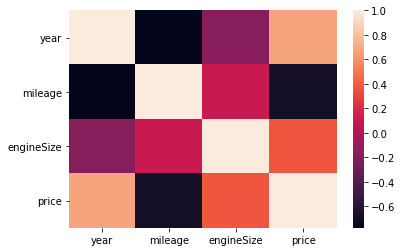

In [7]:
import seaborn as sns
sns.heatmap(data.corr())

# Data preprocessing

In [8]:
d=data.duplicated()
print(d)

0       False
1       False
2       False
3       False
4       False
        ...  
3894    False
3895    False
3896    False
3897    False
3898    False
Length: 3899, dtype: bool


In [9]:
data.drop_duplicates(inplace =True)


In [10]:
data.dtypes

model            object
year              int64
transmission     object
mileage           int64
engineSize      float64
fuelType         object
price             int64
dtype: object

In [11]:
data=pd.get_dummies(data)
data


,year,mileage,engineSize,price,model_ C Class,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2020,1200,2.0,30495,1,1,0,0,0,1,0,0,0
1,2020,1000,1.5,29989,1,1,0,0,0,0,0,0,1
2,2020,500,2.0,37899,1,1,0,0,0,1,0,0,0
3,2019,5000,2.0,30399,1,1,0,0,0,1,0,0,0
4,2019,4500,2.0,29899,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,2017,31357,1.6,14700,1,0,1,0,0,1,0,0,0
3895,2018,28248,2.1,18500,1,1,0,0,0,1,0,0,0
3896,2014,48055,2.1,11900,1,0,1,0,0,1,0,0,0
3897,2014,49865,2.1,11300,1,1,0,0,0,1,0,0,0


In [12]:

from sklearn import preprocessing
data_scaler = preprocessing.StandardScaler()
data_scaler= data_scaler.fit_transform(data)
x=data_scaler[:,:-1]
y=data_scaler[:,-1]
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
df=pca.fit_transform(x)


# Data scaling

In [13]:
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaler= data_scaler.fit_transform(data.values)
x=data_scaler[:,1:-1]
y=data_scaler[:,-1]

# feature selection

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 
FeatureSelection = SelectKBest(score_func= chi2 ,k=6) 
x= FeatureSelection.fit_transform(x,y)
print(x.shape)
FeatureSelection.get_support()




(3797, 6)


array([ True, False,  True, False,  True, False, False,  True,  True,
        True, False])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)


In [18]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)



LinearRegression()

In [14]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', random_state = 10) 
model1.fit(x_train, y_train)
#predicting output for test data
y_pred = model1.predict(x_test)

In [40]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor(max_depth=7,random_state=0)
model1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=15,max_depth=7,random_state=0)
model1.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=15, random_state=0)

In [19]:
y_pred=model1.predict(x_test)
y_pred

array([-1.16583987e-03,  3.59518554e-03, -9.24496271e-04, ...,
        3.23330214e-03,  9.98128613e-01,  3.79556992e-03])

In [20]:
model1.score(x_train,y_train)

0.9949340933527991

In [21]:
model1.score(x_test,y_test)

0.9898501411863797

In [22]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,y_pred)
print(error)

0.004906920709572905


In [23]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,y_pred)
print(error)

0.0023479317211964053


In [25]:
import pickle
m=pickle.dumps(model1)
model2=pickle.loads(m)
y_pred=model2.predict(x_test)
y_pred

array([-1.16583987e-03,  3.59518554e-03, -9.24496271e-04, ...,
        3.23330214e-03,  9.98128613e-01,  3.79556992e-03])